In [1]:
import pandas as pd

from sklearn import model_selection

import matplotlib.pyplot as plt

%matplotlib inline



In [2]:
df = pd.read_csv("/data/insurance.csv")
df.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
target = "charges"

y = df[target]
X = df.drop(columns=[target])

In [4]:
pd.get_dummies(X, drop_first=True)

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
5,31,25.740,0,0,0,0,1,0
6,46,33.440,1,0,0,0,1,0
7,37,27.740,3,0,0,1,0,0
8,37,29.830,2,1,0,0,0,0
9,60,25.840,0,0,0,1,0,0


In [5]:
target = "charges"

y = df[target]
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                        , test_size = 0.3, random_state = 1)


In [6]:
import numpy as np

In [7]:
np.random.seed(1234)
np.random.randn(5)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873])

In [8]:
np.random.randn(5)

array([ 0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

In [9]:
from sklearn import linear_model

In [10]:
target = "charges"

y = df[target]
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                        , test_size = 0.3, random_state = 1)


est = linear_model.LinearRegression()
est.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

Text(0.5, 1.0, 'Residual plot')

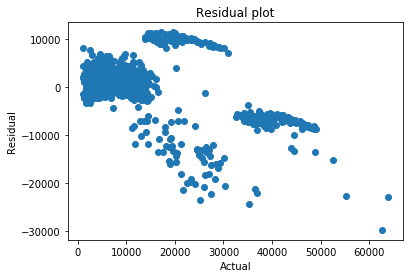

In [12]:
residual = y_train_pred - y_train
plt.scatter(y_train, residual)
plt.xlabel("Actual")
plt.ylabel("Residual")
plt.title("Residual plot")

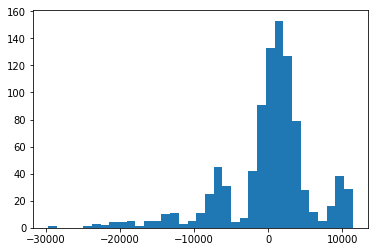

In [13]:
plt.hist(residual, bins = 35);

In [14]:
SSE_train = ((y_train_pred - y_train) ** 2).sum()
SSE_test = ((y_test_pred - y_test) ** 2).sum()

In [15]:
MSE_train = ((y_train_pred - y_train) ** 2).mean()
MSE_test = ((y_test_pred - y_test) ** 2).mean()

In [16]:
MSE_train/MSE_test

0.9922564115746513

In [17]:
SST = ((y_train.mean() - y_train) ** 2).sum()

In [18]:
SSE_train/SST

0.24544425073668388

In [19]:
r2 = 1 - SSE_train/SST
r2

0.7545557492633161

In [20]:
from sklearn import metrics

In [21]:
metrics.r2_score(y_train, y_train_pred)

0.7545557492633161

In [22]:
metrics.r2_score(y_test, y_test_pred)

0.7405989316927212

In [23]:
target = "charges"

y = df[target]
X = df.drop(columns=[target])

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                        , test_size = 0.3, random_state = 1)


est = linear_model.LinearRegression()
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print("r2 train", metrics.r2_score(y_train, y_train_pred))
print("r2 test", metrics.r2_score(y_test, y_test_pred))

print("rmse train", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("rmse test", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

r2 train 0.7545557492633161
r2 test 0.7405989316927212
rmse train 6039.6018713245385
rmse test 6063.12265685045


In [24]:
6063 / np.std(y_train)

0.4973426328027082

In [25]:
est.coef_

array([  251.68186515,   322.38910684,   344.9642553 ,  -282.79634661,
       24059.39047692,  -304.09009765,  -939.34209691,  -868.18855866])

In [26]:
pd.DataFrame({"feature": X.columns, "coefficient": est.coef_})

,feature,coefficient
0,age,251.681865
1,bmi,322.389107
2,children,344.964255
3,gender_male,-282.796347
4,smoker_yes,24059.390477
5,region_northwest,-304.090098
6,region_southeast,-939.342097
7,region_southwest,-868.188559


In [27]:
est.intercept_

-11039.23841856155

In [28]:
from sklearn import preprocessing

In [49]:
target = "charges"

y = np.log(df[target])
X = df.drop(columns=[target])
X["high_bmi"] = np.where(X.bmi>30, 1, 0)
X["age_group"] = np.where(X.age>60, 1, 0)


X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values.astype("float")
                                    , y , test_size = 0.3, random_state = 1)



poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

est = linear_model.SGDRegressor(random_state=1, eta0=0.001, tol=1e-5, learning_rate="constant"
                            , max_iter= 10000)
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print("r2 train", metrics.r2_score(y_train, y_train_pred))
print("r2 test", metrics.r2_score(y_test, y_test_pred))

print("rmse train", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("rmse test", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

r2 train 0.8318608479146061
r2 test 0.866664592295433
rmse train 0.3772563476716206
rmse test 0.3349028044697837


In [82]:
a = np.random.random((4, 100))
print(a.shape)
preprocessing.PolynomialFeatures(degree=3,include_bias=False).fit_transform(a).shape

(4, 100)


(4, 176850)

In [48]:
X

,age,bmi,children,high_bmi,age_group,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,0,0,1,0,0,1
1,18,33.770,1,1,0,1,0,0,1,0
2,28,33.000,3,1,0,1,0,0,1,0
3,33,22.705,0,0,0,1,0,1,0,0
4,32,28.880,0,0,0,1,0,1,0,0
5,31,25.740,0,0,0,0,0,0,1,0
6,46,33.440,1,1,0,0,0,0,1,0
7,37,27.740,3,0,0,0,0,1,0,0
8,37,29.830,2,0,0,1,0,0,0,0
9,60,25.840,0,0,0,0,0,1,0,0


In [30]:
est.coef_

array([3181.24850189, 2433.29375159,  926.40797867,   15.04845114,
       8923.41157985, -315.00550733,  -86.43310823, -254.20907195])

In [31]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7
count,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02
mean,-9.014631e-17,3.054122e-15,-1.869795e-16,-1.119712e-16,1.775645e-16,1.560955e-16,1.518254e-17,2.436323e-16
std,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00
min,-1.485041e+00,-2.419524e+00,-9.040023e-01,-1.023787e+00,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
25%,-9.144925e-01,-7.247116e-01,-9.040023e-01,-1.023787e+00,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
50%,-5.867016e-02,-3.076297e-02,-8.567913e-02,9.767656e-01,-5.096643e-01,-5.592522e-01,-6.003875e-01,-5.872202e-01
75%,8.684707e-01,6.631857e-01,7.326440e-01,9.767656e-01,-5.096643e-01,-5.592522e-01,1.665591e+00,1.702939e+00
max,1.795612e+00,3.689196e+00,3.187613e+00,9.767656e-01,1.962076e+00,1.788102e+00,1.665591e+00,1.702939e+00


In [32]:
X

,age,bmi,children,gender_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
5,31,25.740,0,0,0,0,1,0
6,46,33.440,1,0,0,0,1,0
7,37,27.740,3,0,0,1,0,0
8,37,29.830,2,1,0,0,0,0
9,60,25.840,0,0,0,1,0,0


In [47]:
a = np.array([
    [1, 2, 3],
    [1, 1, 1],
    [4, 3, 2],
    [-1, 0, 1]
])

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit_transform(a)

array([[ 1.,  2.,  3.,  1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 4.,  3.,  2., 16., 12.,  8.,  9.,  6.,  4.],
       [-1.,  0.,  1.,  1., -0., -1.,  0.,  0.,  1.]])

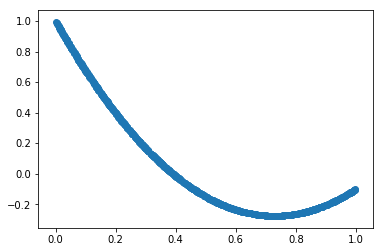

In [66]:
x = np.random.random([1000])
y = 1 - 3.5 * x + 2.4 * x ** 2
plt.scatter(x, y)

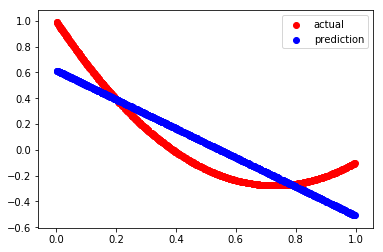

In [68]:
lr = linear_model.LinearRegression()
lr.fit(x.reshape((-1,1)), y)
y_pred = lr.predict(x.reshape((-1,1)))
plt.scatter(x, y, color = "red", label = "actual")
plt.scatter(x, y_pred, color = "blue", label = "prediction")
plt.legend()

In [69]:
lr.coef_, lr.intercept_


(array([-1.12788916]), 0.6177143989410658)

[-0.97239347  0.67504053] [0.05268542]


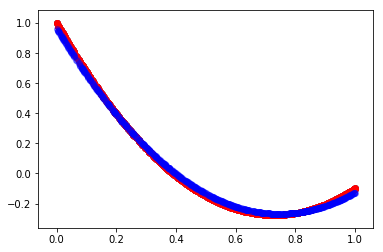

In [118]:
x = np.random.random([1000])
y = 1 - 3.5 * x + 2.4 * x ** 2
x = x.reshape((-1, 1))
plt.scatter(x, y)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est",linear_model.SGDRegressor(random_state=13123, eta0=0.001, tol=1e-5, alpha = 0.0
                            , learning_rate="constant"
                            , max_iter= 1000))
])
                               
pipe.fit(x, y)

y_pred = pipe.predict(x)
plt.scatter(x.flatten(), y, color = "red", label = "actual", )
plt.scatter(x.flatten(), y_pred, color = "blue", label = "prediction", alpha = 0.2)
est = pipe.steps[-1][-1]
print(est.coef_, est.intercept_)

In [99]:
x_poly

array([[8.26995940e-01, 6.83922284e-01],
       [6.63426735e-01, 4.40135033e-01],
       [1.18035931e-01, 1.39324809e-02],
       ...,
       [9.09980963e-01, 8.28065354e-01],
       [2.54397331e-03, 6.47180019e-06],
       [1.83526895e-01, 3.36821211e-02]])

In [75]:
lr.intercept_, lr.coef_

(array([0.33927395]), array([-0.39223909, -0.26100614]))

In [83]:
from sklearn import pipeline

In [121]:
target = "charges"

y = np.log(df[target])
X = df.drop(columns=[target])
X["high_bmi"] = np.where(X.bmi>30, 1, 0)
X["age_group"] = np.where(X.age>60, 1, 0)


X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X.values.astype("float")
                                    , y , test_size = 0.3, random_state = 1)


pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est",linear_model.SGDRegressor(random_state=1, eta0=0.001, tol=1e-5
                            , learning_rate="constant"
                            , max_iter= 10000))
])
pipe.fit(X_train, y_train)

y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

print("r2 train", metrics.r2_score(y_train, y_train_pred))
print("r2 test", metrics.r2_score(y_test, y_test_pred))

print("rmse train", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("rmse test", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

r2 train 0.8318608479146061
r2 test 0.866664592295433
rmse train 0.3772563476716206
rmse test 0.3349028044697837


In [87]:
import pickle

In [89]:
with open("model.pkl", "wb") as f:
    pickle.dump(pipe, f)

In [90]:
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

In [91]:
model

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('est', SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.001, fit_intercept=True, l1_ratio=0.15,
...dom_state=1, shuffle=True, tol=1e-05, validation_fraction=0.1,
       verbose=0, warm_start=False))])

In [92]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("r2 train", metrics.r2_score(y_train, y_train_pred))
print("r2 test", metrics.r2_score(y_test, y_test_pred))

print("rmse train", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("rmse test", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

r2 train 0.8318608479146061
r2 test 0.866664592295433
rmse train 0.3772563476716206
rmse test 0.3349028044697837
